# 2D Ising Model
## Simulation Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
class IsingSimulation:

    J = 6.34369e-21  # Interaction constant for iron [Joule]
    kB = 1.38065e-23  # Boltzmann constant [Joule / Kelvin]

    def __init__(self, size, temperature=300, h=0):
        '''
        Create a new Ising model simulation. The state is initialized
        randomly.

        Arguments:

            size (int) The number of cells along each dimension of the
              square grid.

            temperature (float) The temperature in Kelvin at which to
              run the simulation. The Curie temperature for iron is
              1043 K. Room temperature is about 300 K. Default: 300.
              
            h (float) The external field applied to the grid
        '''
        self.size = size
        self.temperature = temperature
        self.h = h
        self.state = scipy.random.choice(
            [-1, +1], size=(self.size, self.size))
        self.step = 0

    def special_init(self, dir = 1):
      '''
      Set the starting state as a special state.
      '''
      if dir == 1:
        self.state = np.ones(shape=(self.size, self.size))
        self.step = 0
      
      else:
        self.state = np.zeroes(shape=(self.size, self.size))
        self.step = 0

    def set_temperature(self, temp):
        '''
        Set the temperature of the model in Kelvin.
        '''
        self.temperature = float(temp)
        
    def set_h(self, temp):
        '''
        Set the external magnetic field acting on the model
        ''' 
        self.h = temp

    def energy(self):
        '''
        Compute the energy of the current state of the model.
        '''    
        return ((-self.J * (self.state * (
            scipy.roll(self.state, 1, axis=0) +
            scipy.roll(self.state, 1, axis=1) +
            scipy.roll(self.state, -1, axis=0) +
            scipy.roll(self.state, -1, axis=1))).sum()) - 
               self.h * self.state.sum())

    def average_magnetism(self):
        '''
        Compute the average per-cell magnetism of the current state
        of the model.
        '''     
        return self.state.mean()

    def update(self):
        '''
        Do a single cell update of the model state.
        '''
        # Pick a random cell to flip
        i, j = scipy.random.randint(self.size, size=2)

        # Change in energy from current state to next state
        # Calculates the energy for this single cell
        delta_E = ((2 * self.J * self.state[i,j] * (
            self.state[(i + 1) % self.size, j] +
            self.state[(i - 1) % self.size, j] +
            self.state[i, (j + 1) % self.size] +
            self.state[i, (j - 1) % self.size]))
                   + 2 * self.h * self.state[i,j])

        # Log probability of changing state
        log_p = -delta_E / (self.temperature * self.kB)
        
        #Determines if the state should be flipped
        if scipy.log(scipy.random.uniform(0, 1)) < log_p:
            self.state[i,j] = -self.state[i,j]

        self.step += 1

    def display(self):
        '''
        Plot the state of the model.
        '''
        plt.figure()
        plt.imshow(self.state, vmin=-1, vmax=+1)
        plt.title('Step: ' + str(self.step) + ', M = ' + str(self.average_magnetism()))


## Testing the simulation

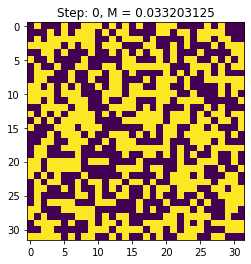

In [3]:
J = 6.34369e-21  # Interaction constant for iron [Joule]
kB = 1.38065e-23  # Boltzmann constant [Joule / Kelvin]
h = 0 # No external magnetic field
size = 32



sim = IsingSimulation(size)
steps = []
mags = []

sim.display()

In [ ]:
for _ in range(1000000):
    sim.update()
    if _ % 100 == 0:
        steps.append(_)
        mags.append(sim.average_magnetism())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:101: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead


-0.2376


Text(0, 0.5, 'Average magnetisation')

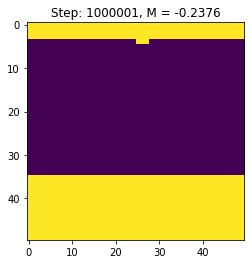

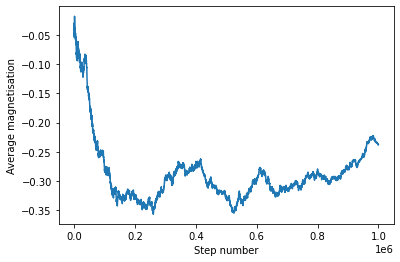

In [ ]:
sim.display()
plt.figure()

print(sim.average_magnetism())
plt.plot(steps[1:], mags)
plt.xlabel("Step number")
plt.ylabel("Average magnetisation")

# Critical Temperature

## Average Magnetization vs Time Plot

I take several values for the temperature and then run the model for $10^6$ updates and plot how the magnatization changes over time.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:91: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead


-1.0


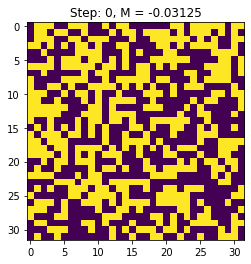

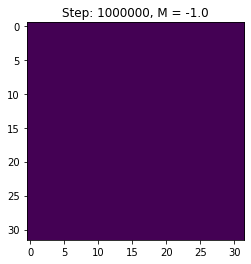

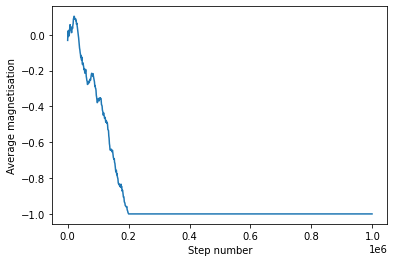

-1.0


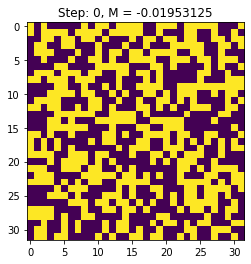

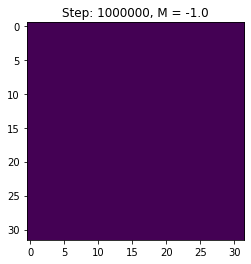

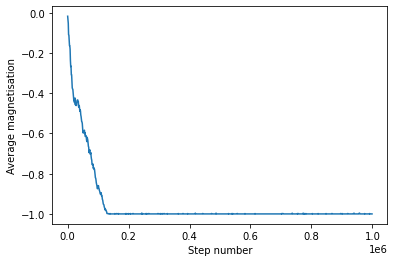

0.96875


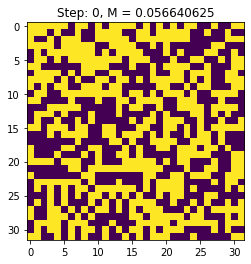

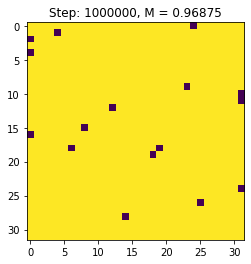

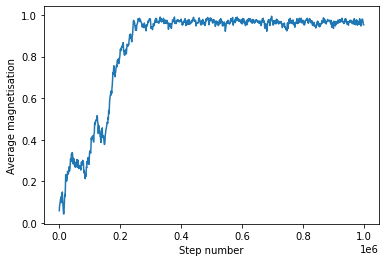

0.91796875


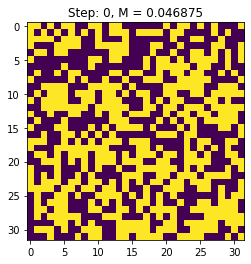

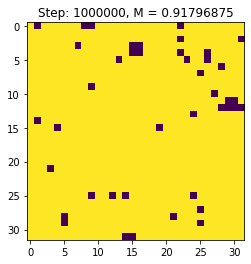

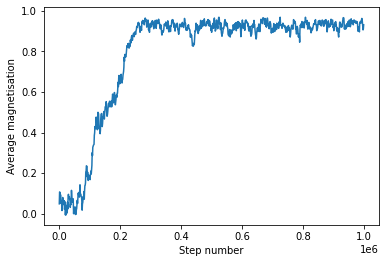

0.833984375


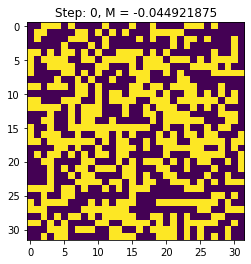

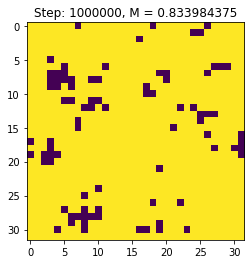

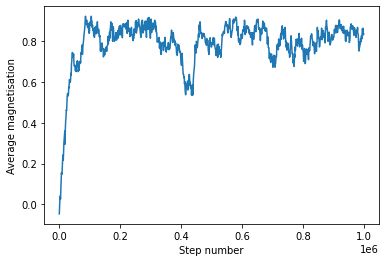

0.048828125


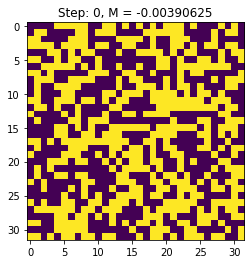

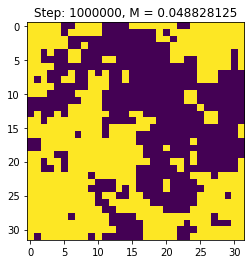

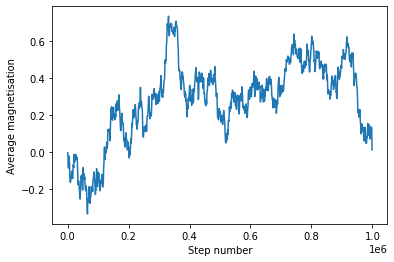

-0.318359375


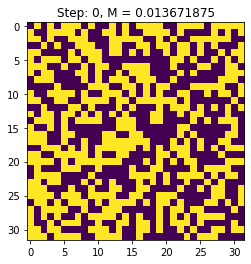

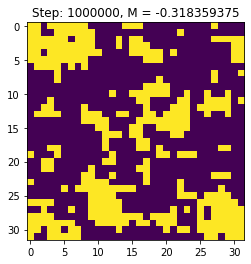

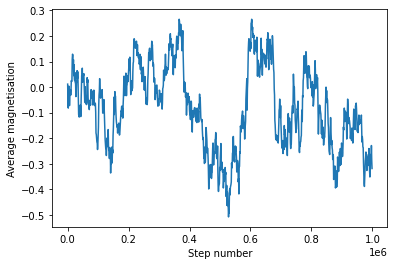

-0.009765625


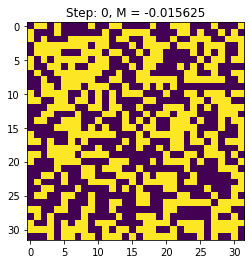

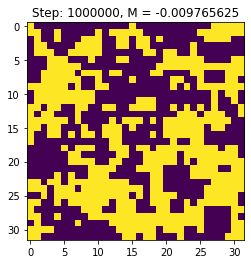

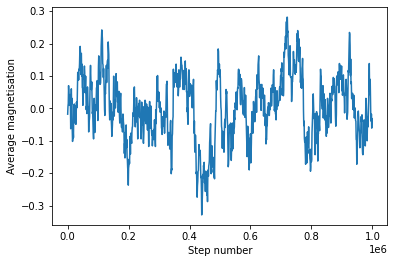

In [4]:
temperatures = [200, 400, 800, 900, 1000, 1100, 1200, 1400]
avg_mags = []

size = 32

for temp in temperatures:
    sim = IsingSimulation(size)
    sim.set_temperature(temp)
    
    steps = []
    mags = []

    sim.display()

    for _ in range(1000000):
        sim.update()
        if _ % 1000 == 0:
            steps.append(_)
            mags.append(sim.average_magnetism())

    sim.display()
    plt.figure()

    print(sim.average_magnetism())
    plt.plot(steps, mags)
    plt.xlabel("Step number")
    plt.ylabel("Average magnetisation")
    plt.show()
    avg_mags.append(sim.average_magnetism())

From the above graph, we can say that, for the first 5 system (temp = 200,400,800,900,1000), clearly we are below the critical temperature as the average magnitude very saliently goes towards either +1 or -1.

Now the last one (temp = 1400) always stays very close to 0 (between -0.2 to 0.2). So it is most likely over critical temperature. 

The second last (temp = 1200) also stays pretty close to 0. It has covered a larger interval than the last one (-0.4 to 0.3), but still its movement is not very arbitary or random as we should expect in a critical temperature.

The remaining one, third last one (temp = 1100) shows most close behaviour to a critical system. It is not oscillating around 0 and neither it is going straightly to +1 or -1. It started to go towards +1, but then it again started to decrease and comes close to 0.

So most likely this is the closest of a critical temperature. Thus critical temperature lies somewhere close to 1100 K and it is certainly above 1000 K and lower than 1200 K.

## Histogram of Several Trials

Ideally, if we run the system for several different trials, it could give us more information than running it only one.

Below critical temperature, without any external field (h=0), we should expect that in the long run, the full system will always converge to either total up or total down, thus average magnetization, $<m> = +1$ or $<m> = -1$. So if we run several trial and plot the histogram of their final average magnetization, then it should have two distinct peak around +1 and -1.

Then above critical temperature, the system always stays close to 0 average magnetization over long time. So if we run several systems and plot the histogram of their final $<m>$, then it should be a normal distribution centered around 0 and it should have a SD proportional to $\sqrt{n}$ from the central limit theorem.

But at critical temperature, the movement of the system is totally random and it does not follow the central limit theorem at this point. So the system can move very arbitarily and thus instead of a normal distribution, we should expect more like a uniform distribution or maybe a normal distribution with a very high SD.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:101: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead


Icing Model with Temp = 200
Icing Model with Temp = 400
Icing Model with Temp = 800
Icing Model with Temp = 900
Icing Model with Temp = 1000
Icing Model with Temp = 1100
Icing Model with Temp = 1200
Icing Model with Temp = 1400


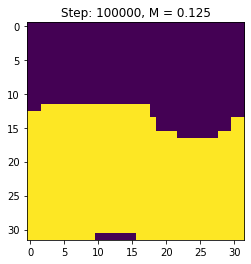

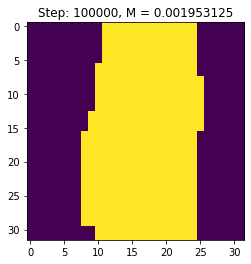

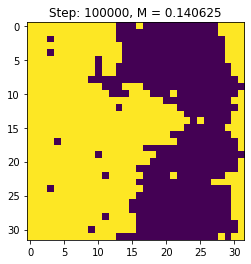

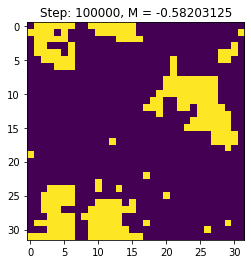

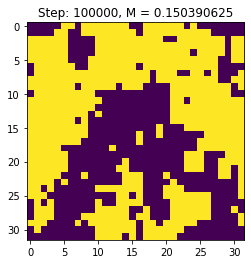

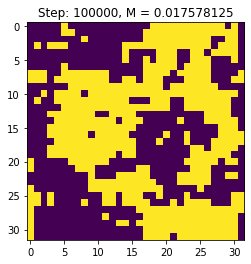

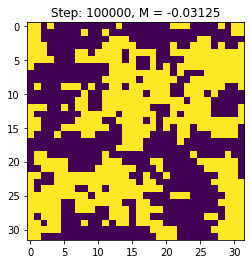

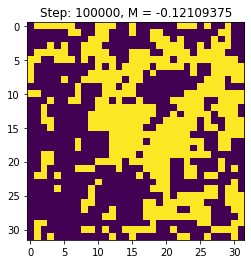

In [17]:
temperatures = [200, 400, 800, 900, 1000, 1100, 1200, 1400]

size = 32

iter = 100
magnetization = np.zeros((len(temperatures), iter))

for i in range(len(temperatures)):
    temp = temperatures[i]

    for k in range(iter): 

        sim = IsingSimulation(size)
        sim.set_temperature(temp)
    
        for _ in range(100000):
            sim.update()
        
        magnetization[i, k] = sim.average_magnetism()
        
    print('Icing Model with Temp =', temp)
    sim.display()

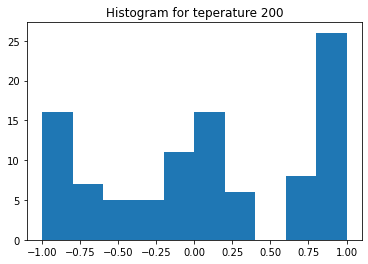

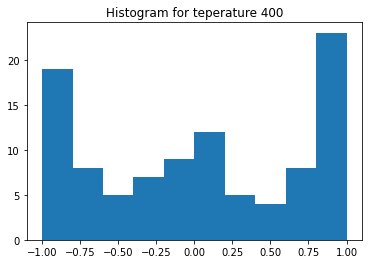

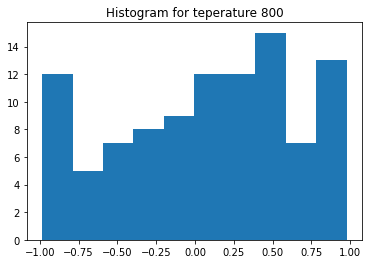

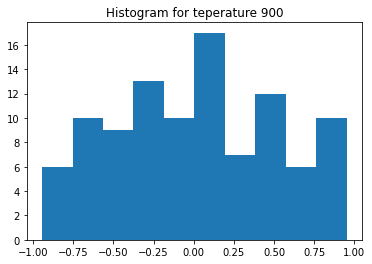

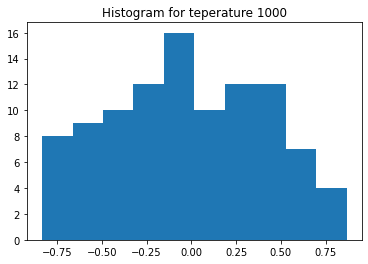

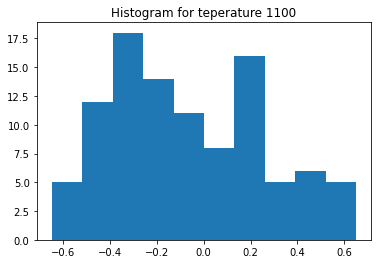

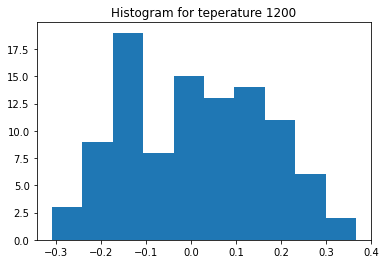

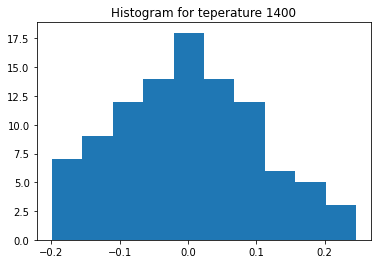

In [19]:
for i in range(len(temperatures)):
    plt.hist(magnetization[i])
    plt.title(f'Histogram for teperature {temperatures[i]}')
    plt.show()

It seems like these histograms cannot give us more information than the previous M vs time plot. The reason is most probably here, we run the systems for a smaller number of updates ($10^5$).

But still we can see that first three system (temp = 200,400,800) shows somewhat a double peak histogram, where the last one (temp = 1400) shows a very nice normal distribution. 

The second last one (temp = 1200) has a very small range again and thus it cannot be the critical one.

So we are left with the middle three one. 

So combining these graphs with the graphs of the previous section, we can say that the critical temperature lies somewhere between 1000 K to 1200 K.

# Average Magnetization

The following is the final average magnetization that we got from the $10^6$ updates from the section "Magnetization vs Time plot". We can use that to test how the theoretical magnetization compares with these empirical results.

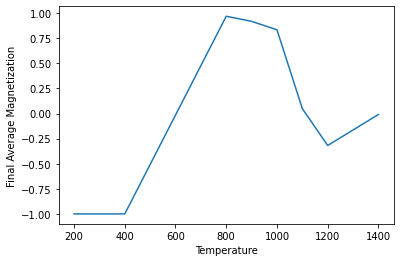

In [6]:
plt.plot(temperatures, avg_mags)
plt.ylabel('Final Average Magnetization')
plt.xlabel('Temperature')
plt.show()

0 9.189425270705826


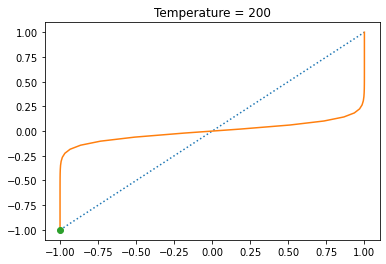

0 4.594712635352913


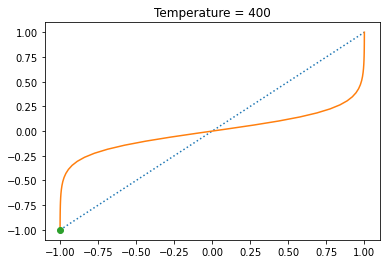

0 2.2973563176764564


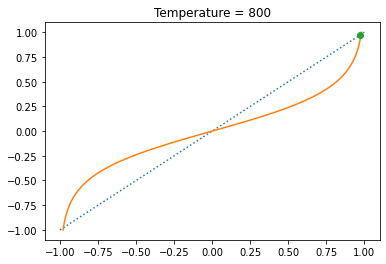

0 2.0420945046012946


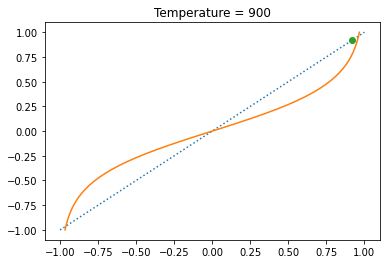

0 1.8378850541411655


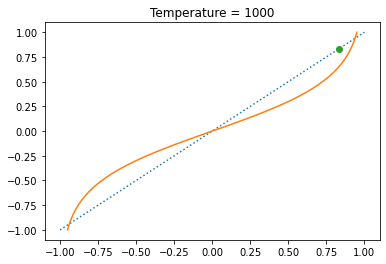

0 1.6708045946737868


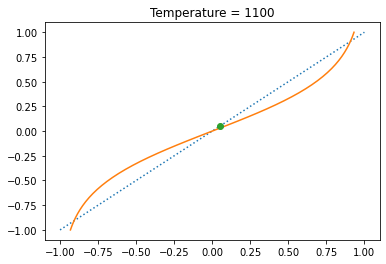

0 1.5315708784509712


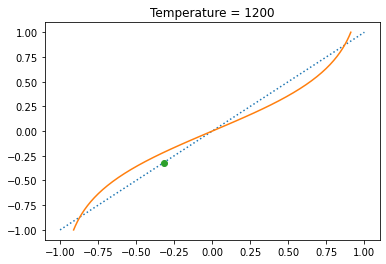

0 1.312775038672261


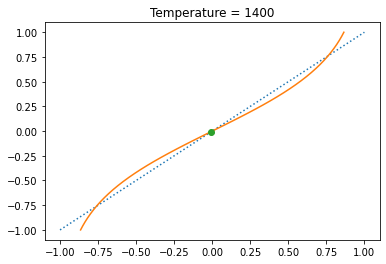

In [17]:
import math

h = 0
d = 2
for i in range(len(temperatures)):
    temp = temperatures[i]

    M = np.linspace(-1, 1, 50)
    y = [math.tanh((h+2*d*J*x)/(kB*temp)) for x in M]

    plt.plot(M, M, ls=":")
    plt.plot(y, M)
    plt.plot(avg_mags[i], avg_mags[i], marker = 'o')
    plt.title(f'Temperature = {temp}')
    plt.show()

Here, we need to keep in mind that see that, the mean field theory works only after the system got enough updates and it reached to its optimal condition.

Now in these plots, the solutions are only the points where the orange curve and the dotted curve interconnects. The green dots are our empirical result. 

We can see that for the first three system, the green points are at a joint. But for 4th and 5th system (temp = 900,1000) it doesn't match with the joint. It is because the system needs more times (i.e. more updates) to reach to its optimal condition, which is to have $<m>=1$.

The last one also matches as it is already in its final condition, where the second last one (temp = 1200) doesn't coincide. So this is also because it needs more time to come to 0. Another point is that when the system is near critical temperature, the system fluctuates a lot and it takes quite long time (i.e. very large number of updates) before coming to its optimal condition. And the more it goes towards critical temperature, the more the fluctuation becomes arbitrary. So in critical temperature, we should expect to see that the empirical $<m>$ will not match with the mean field theory because the $<m>$ will continue to change/fluctuate. In our case, for temp = 1100, it matches with the joint, but it happens only due to a random chance. If we make more update to the system, it will likely to move around and not stay close to the inter-joint points.

So in summary, the empirical result will deviate from the mean-field theory approximation at critical temperature and when the system is very close to the critical temperature.
